In [4]:
import pandas as pd

# Load the dataset
file_path = '/Users/tanjinamoon/Desktop/Analytics Design and Applications/nls_emp_survey.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()


,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,810081,6,3,5,4,3,6,5,3,5,4,6,4
1,2,512221,2,5,3,3,6,2,3,5,3,2,2,3
2,3,177541,3,2,3,5,2,3,3,2,3,6,3,6
3,4,679938,3,5,3,3,6,2,2,5,2,2,3,2
4,5,777934,3,5,3,5,6,4,4,5,4,6,3,5


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import numpy as np

# Standardizing only the survey question data
feature = data.iloc[:, 2:14]  # Selecting survey question columns Q1 to Q12
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature)

# Performing PCA on the scaled survey data
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculating loadings
loadings = pd.DataFrame(data=pca.components_.T, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
loadings = loadings.set_index(feature.columns)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Q1,0.377841,-0.224249,-0.115196,0.357202,-0.027824,-0.377597,-0.147696,-0.009394,-0.007303,0.014827,-0.023578,-7.071068e-01
Q2,-0.253190,-0.276803,0.383411,0.213789,-0.013124,0.003765,-0.045597,-0.127882,-0.459144,-0.659940,-0.040145,8.271162e-15
Q3,0.351393,-0.251104,-0.138598,0.356234,0.049858,0.751025,0.304280,0.067082,0.008995,-0.034620,0.049681,-3.543733e-15
Q4,0.072333,0.445143,0.198855,0.311536,-0.486822,0.089384,0.006558,-0.631054,0.116429,0.051592,0.023319,5.506175e-16
Q5,-0.260122,-0.267763,0.382000,0.221837,-0.002444,-0.076255,0.127828,0.140555,0.784702,-0.073497,-0.049283,-2.348521e-15
Q6,0.366604,-0.029642,0.343320,-0.282507,0.018812,-0.227827,0.682999,-0.080038,-0.112877,0.046582,-0.356342,-1.027197e-15
Q7,0.361852,-0.033165,0.360231,-0.273266,0.029664,-0.019944,-0.061169,0.003594,0.059887,-0.091904,0.804026,-1.287146e-15
Q8,-0.237301,-0.288001,0.393521,0.195376,0.011486,0.045639,-0.046428,-0.010984,-0.335004,0.736643,0.091389,-5.472480e-15
Q9,0.355177,-0.024317,0.375288,-0.250666,-0.055231,0.283121,-0.602802,0.093015,0.078781,0.010038,-0.456122,1.762462e-15
Q10,0.043768,0.457583,0.195117,0.284303,-0.310746,-0.047849,0.086211,0.732470,-0.157249,-0.037628,0.029358,5.644612e-17


### QID	Question Text

Q1	I prefer training that helps me enhance my job performance, without the need for group interaction.

Q2	I’m motivated to learn new things that expand my abilities and knowledge beyond my day-to-day responsibilities.

Q3	I am more interested in training that enhances my individual skills than in activities focused on team-building.

Q4	I’m not interested in using training for networking or career changes; I value it more for improving my day-to-day work.

Q5	I enjoy training that broadens my knowledge and helps me grow, even if it’s not directly related to my current role.

Q6	I am motivated by training that not only helps me perform better in my current role but also enhances my overall skills and knowledge.

Q7	I value training that makes me more effective in my job while also helping me grow professionally.

Q8	I find value in training that supports my personal development and inspires me to grow in new directions.

Q9	I look for training opportunities that allow me to develop my role-specific skills and learn new concepts that can help me in the future.

Q10	I’m more interested in improving my current role than in preparing for a new position or career change.

Q11	I find the most value in training that directly impacts my role, rather than in sessions involving group discussions.

Q12	I don’t see training as a way to transition into a new job; I prefer to use it to build on what I’m already doing.

PC1: Individual Skill Development and Job Effectiveness
This component likely represents a focus on enhancing personal skills and job performance, with minimal emphasis on group or networking activities.

PC2: Professional Growth and New Knowledge Acquisition
This component seems to capture a motivation for expanding knowledge beyond immediate job roles, aiming at overall professional growth.

PC3: Role-Specific Skill Enhancement
This component may highlight a preference for role-specific training and development that is directly applicable to current job tasks.

PC4: Knowledge Expansion beyond Current Role
This component seems to reflect an interest in training that broadens knowledge and helps individuals grow, even if it's not directly tied to their current role.

PC5: Job Transition and Career Development Focus
This component may represent training viewed as a potential stepping stone toward career changes or preparing for new roles.

In [7]:
pca_summary_df = pd.DataFrame({
    'PCA': [f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance Ratio': pca.explained_variance_ratio_.cumsum(),
    'Eigenvalue': pca.explained_variance_
})
pca_summary_df

,PCA,Explained Variance Ratio,Cumulative Variance Ratio,Eigenvalue
0,PC1,3.722901e-01,0.372290,4.474939e+00
1,PC2,3.132278e-01,0.685518,3.765009e+00
2,PC3,2.041820e-01,0.889700,2.454275e+00
3,PC4,8.657420e-02,0.976274,1.040625e+00
4,PC5,7.022877e-03,0.983297,8.441522e-02
5,PC6,4.191542e-03,0.987489,5.038248e-02
6,PC7,3.282081e-03,0.990771,3.945073e-02
7,PC8,2.774222e-03,0.993545,3.334624e-02
8,PC9,2.405066e-03,0.995950,2.890898e-02
9,PC10,2.140136e-03,0.998090,2.572451e-02


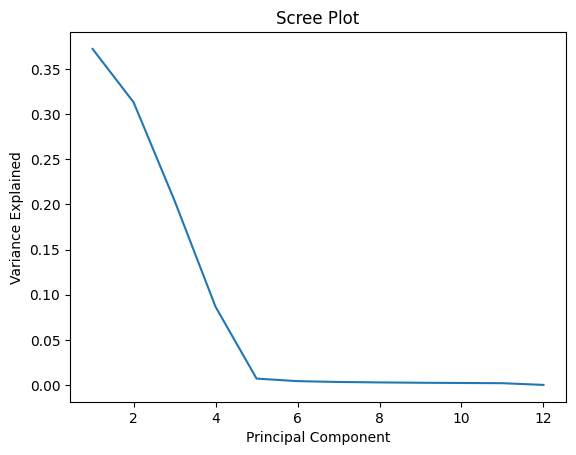

In [8]:
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [9]:
n_pcs = 5
kmeans = KMeans(max_iter=100, n_clusters=3, n_init=10)  # Assuming 3 clusters for this example
kmeans.fit(pca_data[:, :n_pcs])

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [10]:
cluster_centers_pca = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(n_pcs)])
cluster_sizes = pd.Series(kmeans.labels_).value_counts(normalize=True).sort_index()
cluster_centers_pca['size'] = cluster_sizes.values
cluster_centers_pca = cluster_centers_pca.sort_values('size', ascending=False)
cluster_centers_pca

,PC1,PC2,PC3,PC4,PC5,size
1,-0.289671,1.083482,0.261092,0.114878,-0.014422,0.716667
0,3.835531,-2.363906,-0.330290,0.068264,0.025718,0.166667
2,-3.699924,-3.278670,-1.132007,-0.803201,0.051854,0.116667


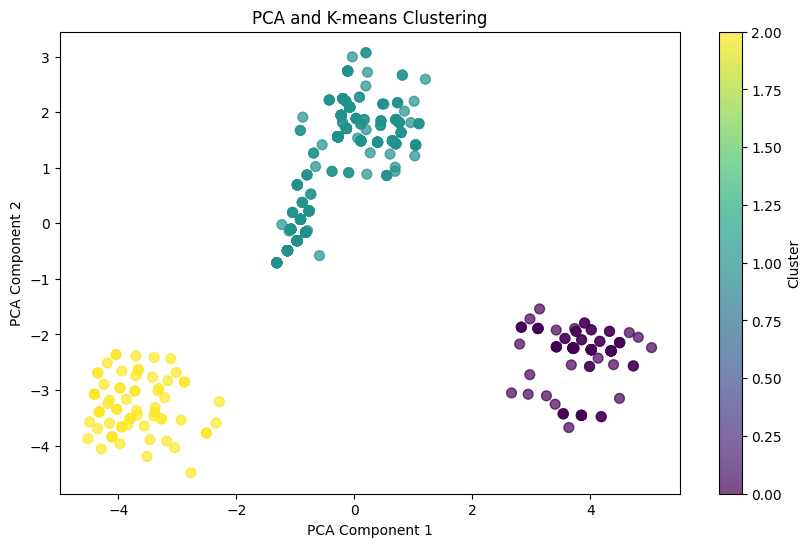

In [11]:
clusters = kmeans.labels_

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA and K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

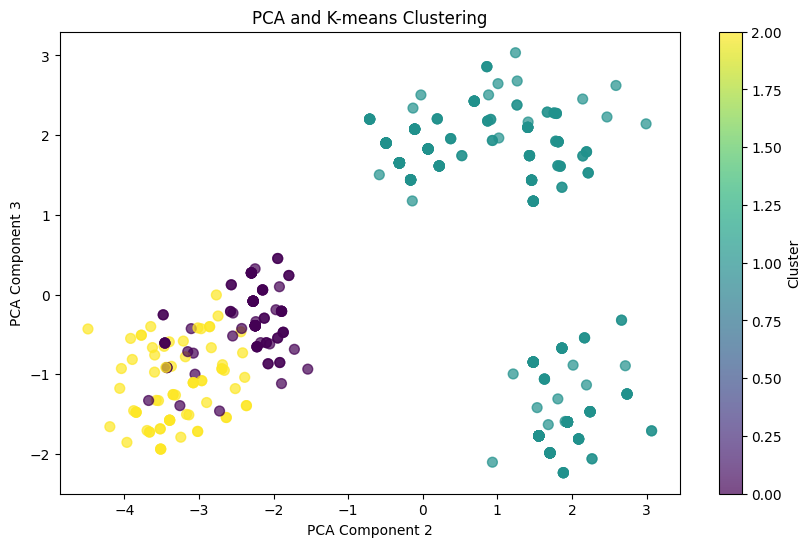

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 3')
plt.title('PCA and K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

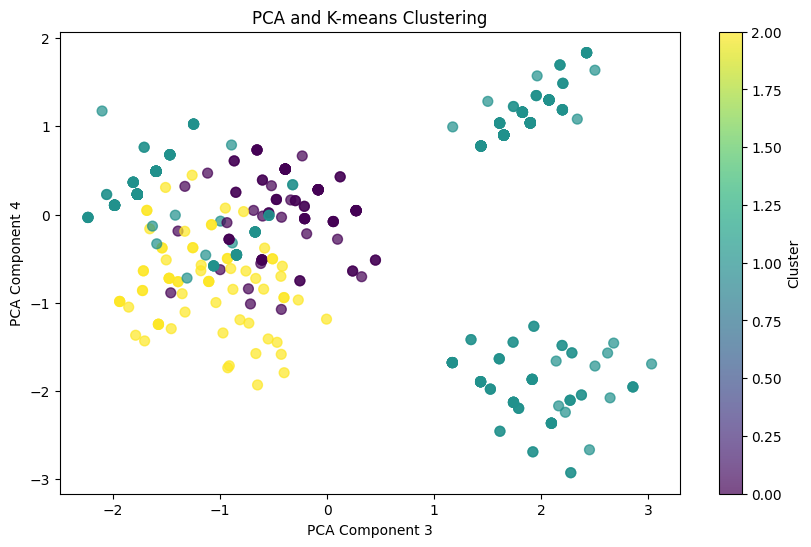

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 2], pca_data[:, 3], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 3')
plt.ylabel('PCA Component 4')
plt.title('PCA and K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

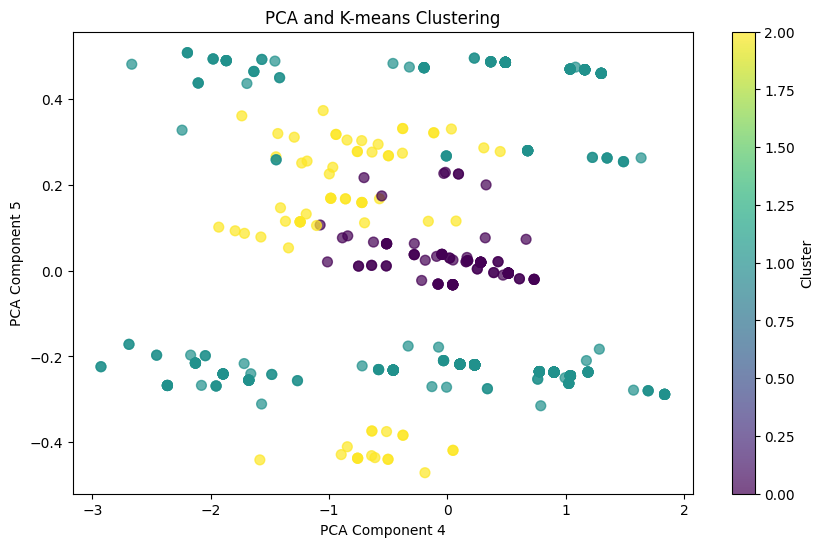

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 3], pca_data[:, 4], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 4')
plt.ylabel('PCA Component 5')
plt.title('PCA and K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

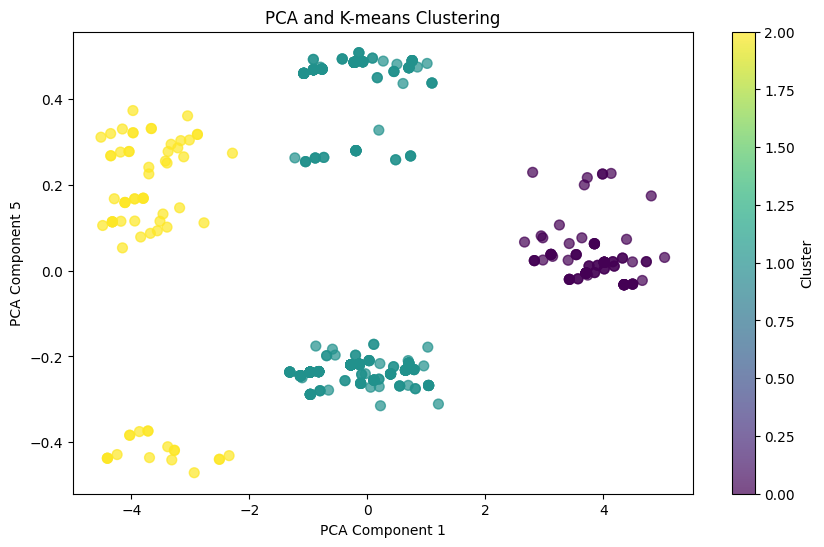

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 4], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 5')
plt.title('PCA and K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
import pandas as pd

# Load your Excel file and CSV file
df_excel = pd.read_excel("/Users/tanjinamoon/Desktop/Analytics Design and Applications/case 2 excel.xlsx", sheet_name=0)  # Adjust sheet_name as needed
df_csv = pd.read_csv("/Users/tanjinamoon/Desktop/Analytics Design and Applications/nls_emp_survey.csv")
df_csv.head()

,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,810081,6,3,5,4,3,6,5,3,5,4,6,4
1,2,512221,2,5,3,3,6,2,3,5,3,2,2,3
2,3,177541,3,2,3,5,2,3,3,2,3,6,3,6
3,4,679938,3,5,3,3,6,2,2,5,2,2,3,2
4,5,777934,3,5,3,5,6,4,4,5,4,6,3,5


In [17]:
df_excel.head()

,Date,Employee_ID,Assessment_ID,Course,Assessment_ID.1,Intake_Proficiency_Score,Intake_Applications_Score,Outcome_Proficiency_Score,Outcome_Applications_Score,Regional_Center_ID,Region,Regional_Center_ID.1,City
0,2019-12-28,128371,P74000,104,P74000,0.135,0.137,0.269,0.238,101.0,North America,101.0,Miami
1,2020-03-09,128371,S60239,102,S60239,0.591,0.526,0.797,0.765,102.0,North America,101.0,Baltimore
2,2020-06-01,128371,D99137,991,D99137,0.425,0.277,0.856,0.628,103.0,North America,101.0,New York
3,2020-10-23,128371,A80585,902,A80585,0.564,0.545,0.758,0.718,104.0,North America,102.0,Seattle
4,2020-10-02,128656,P11265,991,P11265,0.344,0.219,0.820,0.885,201.0,Europe,102.0,San Francisco


In [47]:
# Replace 'employee_id' with the actual common column name
merged_data = pd.merge(df_csv, df_excel, on='Employee_ID', how='left')
merged_data.head()


,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Course,Assessment_ID.1,Intake_Proficiency_Score,Intake_Applications_Score,Outcome_Proficiency_Score,Outcome_Applications_Score,Regional_Center_ID,Region,Regional_Center_ID.1,City
0,1,810081,6,3,5,4,3,6,5,3,...,902,D17671,0.662,0.523,0.779,0.733,NaN,NaN,NaN,NaN
1,1,810081,6,3,5,4,3,6,5,3,...,103,P57790,0.181,0.168,0.537,0.620,NaN,NaN,NaN,NaN
2,1,810081,6,3,5,4,3,6,5,3,...,105,X47895,0.255,0.170,1.000,1.000,NaN,NaN,NaN,NaN
3,2,512221,2,5,3,3,6,2,3,5,...,102,X49857,0.604,0.523,0.782,0.718,NaN,NaN,NaN,NaN
4,3,177541,3,2,3,5,2,3,3,2,...,902,A39783,0.651,0.497,0.811,0.657,NaN,NaN,NaN,NaN


In [19]:
print(merged_data.columns)


Index(['Response', 'Employee_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Date', 'Assessment_ID', 'Course',
       'Assessment_ID.1', 'Intake_Proficiency_Score',
       'Intake_Applications_Score', 'Outcome_Proficiency_Score',
       'Outcome_Applications_Score', 'Regional_Center_ID', 'Region',
       'Regional_Center_ID.1', 'City'],
      dtype='object')


In [20]:
print(data.columns)


Index(['Response', 'Employee_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12'],
      dtype='object')


In [21]:
# Assuming `data` contains 'Employee_ID' and you have run KMeans clustering
clusters_df = pd.DataFrame({
    'Employee_ID': data['Employee_ID'],  # Replace with the correct identifier column in your data
    'cluster': kmeans.labels_  # Assign cluster labels from KMeans
})


In [22]:
print(df_csv.columns)
print(clusters_df.columns)


Index(['Response', 'Employee_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12'],
      dtype='object')
Index(['Employee_ID', 'cluster'], dtype='object')


In [23]:
merged_data_2 = pd.merge(df_csv, clusters_df[['Employee_ID', 'cluster']], on='Employee_ID', how='left')
merged_data_2.head()


,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,cluster
0,1,810081,6,3,5,4,3,6,5,3,5,4,6,4,0
1,2,512221,2,5,3,3,6,2,3,5,3,2,2,3,2
2,3,177541,3,2,3,5,2,3,3,2,3,6,3,6,1
3,4,679938,3,5,3,3,6,2,2,5,2,2,3,2,2
4,4,679938,3,5,3,3,6,2,2,5,2,2,3,2,2


In [55]:
import pandas as pd


# Check if the course data contains the necessary columns
print(df_excel.columns)

# Merge the datasets on 'Employee_ID' to add the 'Course' column to merged_data
# Using 'left' join to keep all rows in merged_data and add Course where there is a match
merged_with_course = pd.merge(merged_data_2, merged_data[['Employee_ID', 'Course']], on='Employee_ID', how='left')

# Display the first few rows of the new dataset
print(merged_with_course.head())
merged_with_course.columns


Index(['Date', 'Employee_ID', 'Assessment_ID', 'Course', 'Assessment_ID.1',
       'Intake_Proficiency_Score', 'Intake_Applications_Score',
       'Outcome_Proficiency_Score', 'Outcome_Applications_Score',
       'Regional_Center_ID', 'Region', 'Regional_Center_ID.1', 'City'],
      dtype='object')
   Response  Employee_ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  \
0         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
1         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
2         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
3         2       512221   2   5   3   3   6   2   3   5   3    2    2    3   
4         3       177541   3   2   3   5   2   3   3   2   3    6    3    6   

   cluster  Course  
0        0     902  
1        0     103  
2        0     105  
3        2     102  
4        1     902  


Index(['Response', 'Employee_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'cluster', 'Course'],
      dtype='object')

In [25]:
import pandas as pd

# Load the Excel file and parse the second sheet
file_path = "/Users/tanjinamoon/Desktop/Analytics Design and Applications/case 2 excel.xlsx"  # Replace with the actual file path
xls = pd.ExcelFile(file_path)
location_data = xls.parse(sheet_name=xls.sheet_names[1])  # Load the second sheet
location_data


,Employee_ID,Course,Regional_Center_ID,Region
0,128371,104,101.0,North America
1,128371,102,102.0,North America
2,128371,991,103.0,North America
3,128371,902,104.0,North America
4,128656,991,201.0,Europe
...,...,...,...,...
19237,874095,104,NaN,NaN
19238,874095,904,NaN,NaN
19239,874109,902,NaN,NaN
19240,874135,902,NaN,NaN


In [49]:
import pandas as pd

# Assuming `location_data` is your DataFrame
# Define the mapping of course ID to location
course_location_mapping = {
    101: 'New York', 102: 'Los Angeles', 103: 'Toronto', 104: 'Denver',
    201: 'London', 202: 'Rotterdam', 203: 'Frankfurt',
    301: 'Shanghai', 302: 'Mumbai', 303: 'Tokyo',
    401: 'Sao Paulo', 402: 'Buenos Aires', 403: 'Mexico City',
    901: 'Virtual', 902: 'Virtual', 903: 'Virtual', 904: 'Virtual'
}

# Add a new column 'Location' by mapping the 'Course' column
location_data['Location'] = location_data['Course'].map(course_location_mapping)

# Display the first few rows to confirm the addition
print(location_data.head(15))


    Employee_ID  Course  Regional_Center_ID         Region     Location
0        128371     104               101.0  North America       Denver
1        128371     102               102.0  North America  Los Angeles
2        128371     991               103.0  North America          NaN
3        128371     902               104.0  North America      Virtual
4        128656     991               201.0         Europe          NaN
5        128753     101               202.0         Europe     New York
6        128856     103               203.0         Europe      Toronto
7        128881     101               301.0           Asia     New York
8        128881     104               302.0           Asia       Denver
9        128895     104               303.0           Asia       Denver
10       128895     991               401.0  Latin America          NaN
11       128896     991               402.0  Latin America          NaN
12       128896     104               403.0  Latin America      

In [27]:
location_data.columns

Index(['Employee_ID', 'Course', 'Regional_Center_ID', 'Region', 'Location'], dtype='object')

In [56]:
import pandas as pd

# Assuming `merged_with_course` and `location_data` are already loaded with relevant columns

# Merge `merged_with_course` with `location_data` on 'Course', keeping only the 'Location' column from `location_data`
merged_with_location = pd.merge(
    merged_with_course,
    location_data[['Course', 'Location']],
    on='Course',
    how='left'
)

# Display the first few rows of the merged result to verify
print(merged_with_location.head())


   Response  Employee_ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  \
0         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
1         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
2         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
3         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   
4         1       810081   6   3   5   4   3   6   5   3   5    4    6    4   

   cluster  Course Location  
0        0     902  Virtual  
1        0     902  Virtual  
2        0     902  Virtual  
3        0     902  Virtual  
4        0     902  Virtual  


In [58]:
# Assuming `merged_with_location` is the DataFrame with 'cluster' and 'Location' columns

# Create a summary table showing the number of employees in each cluster across different locations
summary_by_location_cluster = merged_with_location.groupby(['Location', 'cluster']).size().unstack().fillna(0)

# Rename columns to represent cluster numbers for clarity
summary_by_location_cluster.columns = [f'Cluster {int(col)}' for col in summary_by_location_cluster.columns]

# Display the summary table
summary_by_location_cluster



,Cluster 0,Cluster 1,Cluster 2
Location,,,
Denver,261873,1063657,229543
Los Angeles,57159,234549,43362
New York,102564,516483,124542
Toronto,27302,155125,13651
Virtual,127286,667427,107758


Distribution of Clusters across Locations:
 cluster           0        1       2
Location                            
Denver       261873  1063657  229543
Los Angeles   57159   234549   43362
New York     102564   516483  124542
Toronto       27302   155125   13651
Virtual      127286   667427  107758


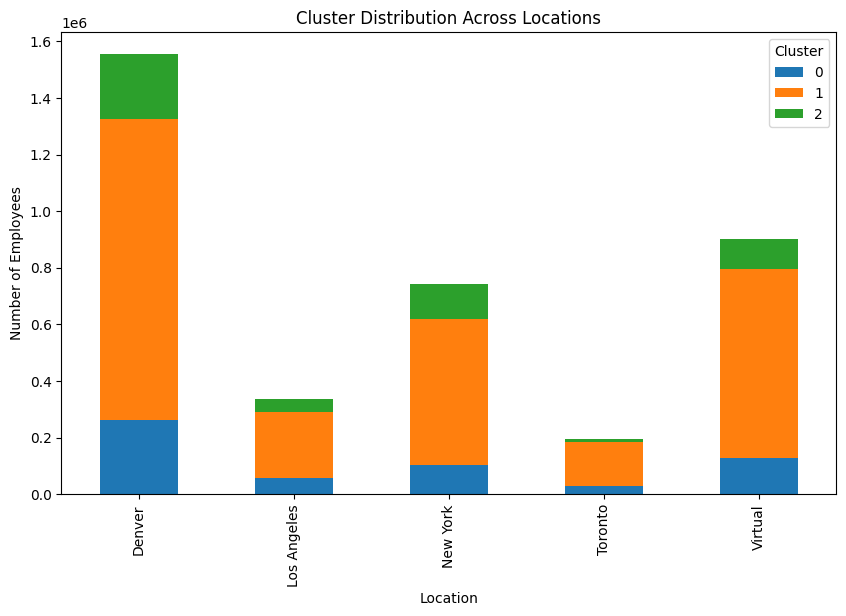

Chi-square Test Results:
Chi-square Statistic: 24525.97277763971
p-value: 0.0
There are significant differences in cluster composition across locations (p < 0.05).


In [39]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming `merged_with_location` is the final DataFrame with 'cluster' and 'Location' columns

# Step 3.1: Group by Location and Cluster to get the distribution counts
location_cluster_counts = merged_with_location.groupby(['Location', 'cluster']).size().unstack().fillna(0)

# Display the counts to understand the distribution
print("Distribution of Clusters across Locations:\n", location_cluster_counts)

# Step 3.2: Visualization - Stacked bar chart for cluster distribution by location
location_cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Cluster Distribution Across Locations")
plt.xlabel("Location")
plt.ylabel("Number of Employees")
plt.legend(title="Cluster")
plt.show()

# Step 3.3: Statistical Testing - Chi-square test to check for significant differences across locations
chi2, p, dof, expected = stats.chi2_contingency(location_cluster_counts)

print("Chi-square Test Results:")
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpretation based on the p-value
if p < 0.05:
    print("There are significant differences in cluster composition across locations (p < 0.05).")
else:
    print("No significant differences in cluster composition across locations (p >= 0.05).")

# Step 4: Summarize Findings
# Based on the results, summarize the key insights about how clusters differ across locations.
# If the p-value is below 0.05, mention that cluster compositions vary significantly by location.


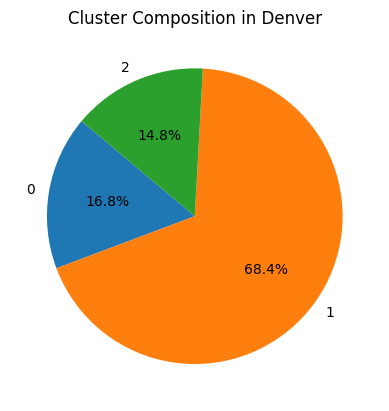

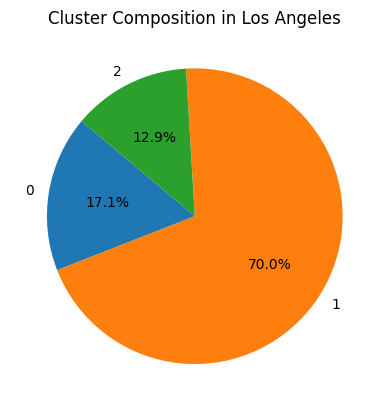

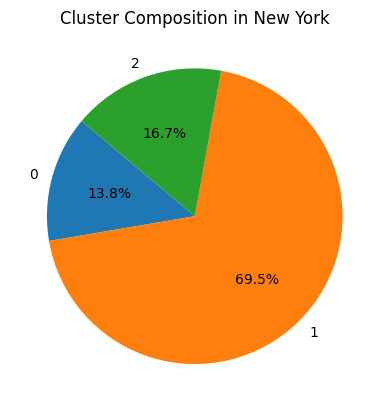

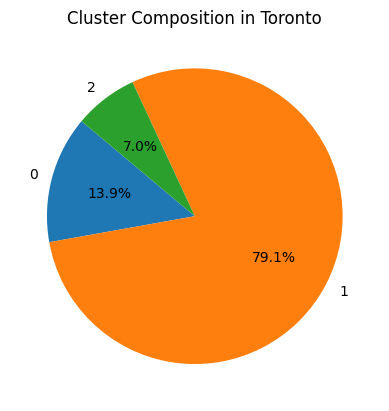

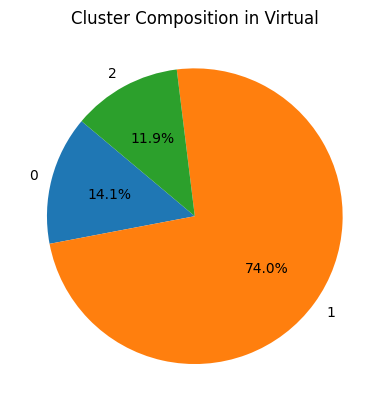

In [40]:
import matplotlib.pyplot as plt

# Plot pie charts for each location
for location in location_cluster_counts.index:
    plt.figure()
    location_cluster_counts.loc[location].plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f"Cluster Composition in {location}")
    plt.ylabel('')  # Hide the y-label for better appearance
    plt.show()


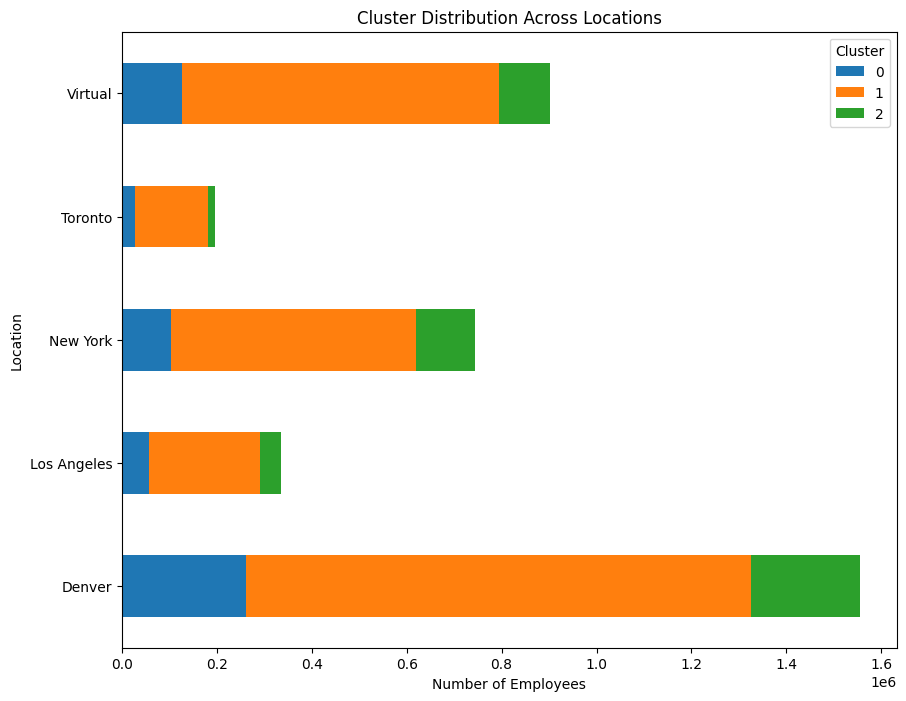

In [41]:
location_cluster_counts.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title("Cluster Distribution Across Locations")
plt.xlabel("Number of Employees")
plt.ylabel("Location")
plt.legend(title="Cluster")
plt.show()


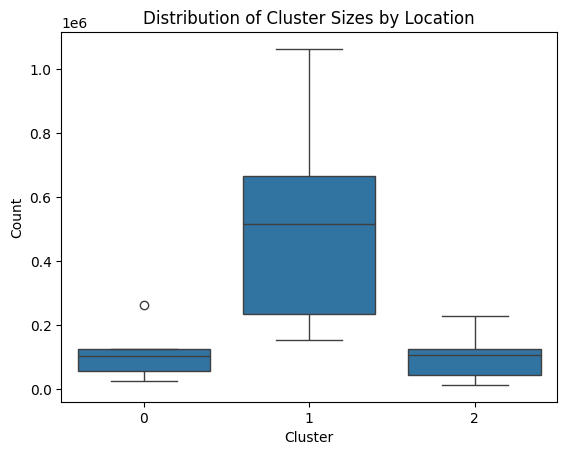

In [42]:
# Melt the DataFrame for easier plotting with seaborn or matplotlib
melted_data = location_cluster_counts.reset_index().melt(id_vars="Location", var_name="Cluster", value_name="Count")

import seaborn as sns
sns.boxplot(x="Cluster", y="Count", data=melted_data)
plt.title("Distribution of Cluster Sizes by Location")
plt.show()


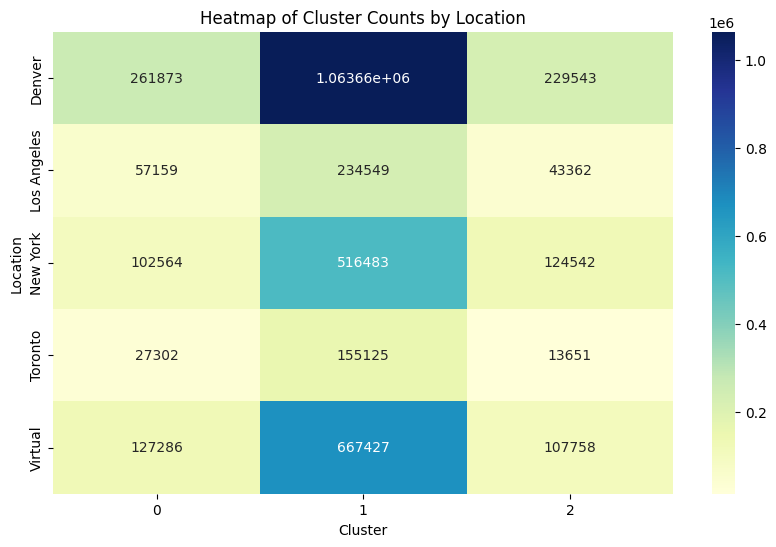

In [43]:
import seaborn as sns

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(location_cluster_counts, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Heatmap of Cluster Counts by Location")
plt.xlabel("Cluster")
plt.ylabel("Location")
plt.show()


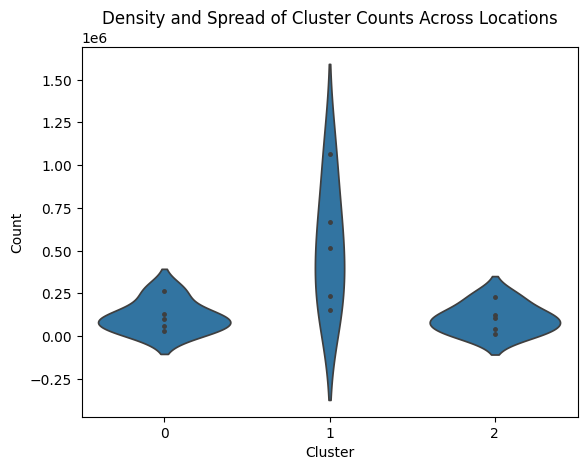

In [44]:
sns.violinplot(x="Cluster", y="Count", data=melted_data, inner="point")
plt.title("Density and Spread of Cluster Counts Across Locations")
plt.show()


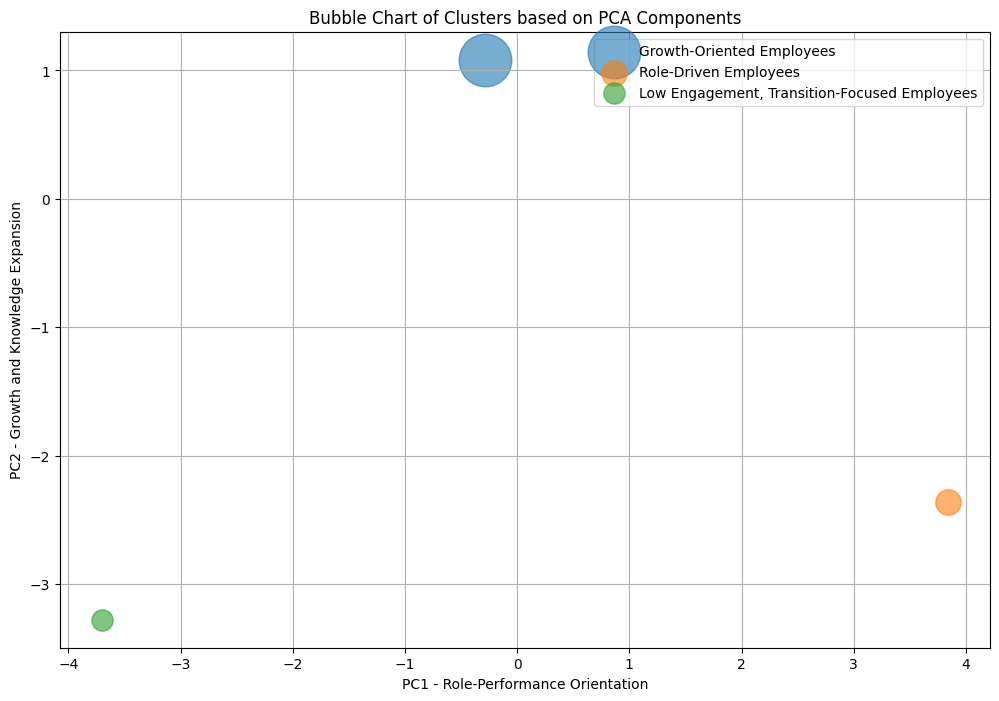

In [29]:
import matplotlib.pyplot as plt

# Data for Bubble Chart based on PCA values and cluster sizes
clusters = [
    {'PC1': -0.289671, 'PC2': 1.083482, 'size': 0.716667 * 2000, 'label': 'Growth-Oriented Employees'},  # Scaled size for visualization
    {'PC1': 3.835531, 'PC2': -2.363906, 'size': 0.166667 * 2000, 'label': 'Role-Driven Employees'},
    {'PC1': -3.699924, 'PC2': -3.278670, 'size': 0.116667 * 2000, 'label': 'Low Engagement, Transition-Focused Employees'}
]

# Create the bubble chart
plt.figure(figsize=(12, 8))
for cluster in clusters:
    plt.scatter(cluster['PC1'], cluster['PC2'], s=cluster['size'], alpha=0.6, label=cluster['label'])

# Labels and Title
plt.xlabel("PC1 - Role-Performance Orientation")
plt.ylabel("PC2 - Growth and Knowledge Expansion")
plt.title("Bubble Chart of Clusters based on PCA Components")
plt.legend()
plt.grid(True)
plt.show()


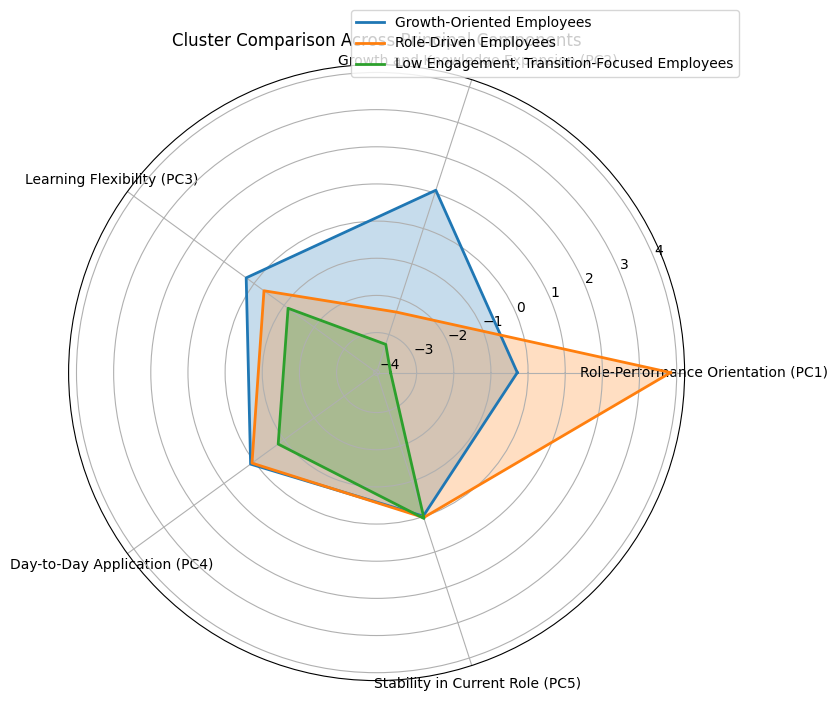

In [30]:
 import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

# Data for radar chart based on PCA values for each cluster
cluster_means = pd.DataFrame({
    'Role-Performance Orientation (PC1)': [-0.289671, 3.835531, -3.699924],
    'Growth and Knowledge Expansion (PC2)': [1.083482, -2.363906, -3.278670],
    'Learning Flexibility (PC3)': [0.261092, -0.330290, -1.132007],
    'Day-to-Day Application (PC4)': [0.114878, 0.068264, -0.803201],
    'Stability in Current Role (PC5)': [-0.014422, 0.025718, 0.051854]
}, index=['Growth-Oriented Employees', 'Role-Driven Employees', 'Low Engagement, Transition-Focused Employees'])

# Number of variables we're plotting
categories = list(cluster_means.columns)
num_vars = len(categories)

# Compute angle for each axis in the radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for i, (index, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.25)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Cluster Comparison Across Principal Components")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()


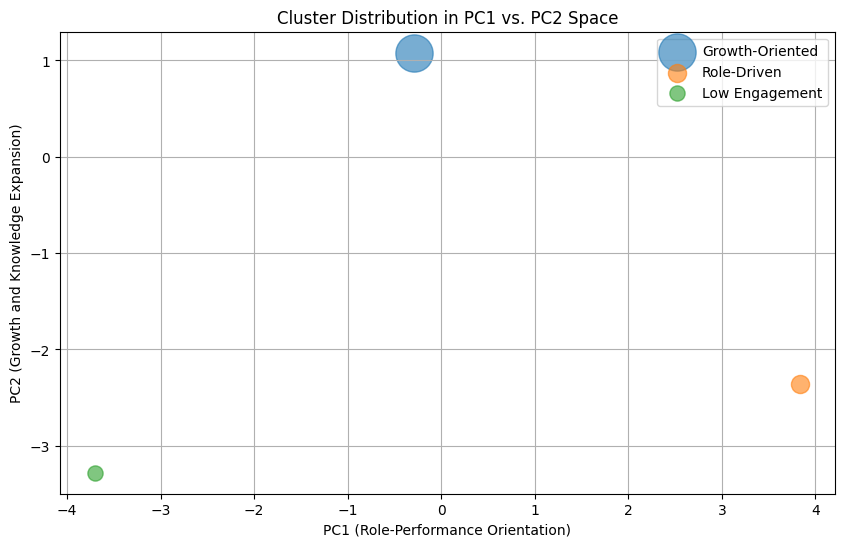

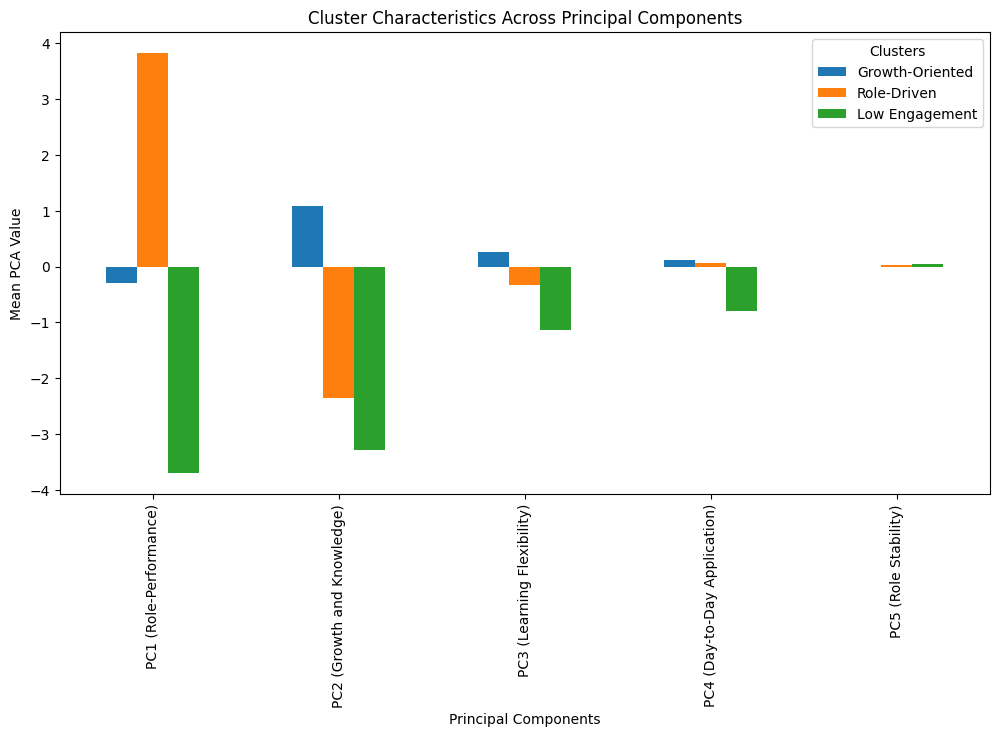

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Cluster Characteristics (Growth-Oriented, Role-Driven, Low Engagement)
cluster_centers = pd.DataFrame({
    'PC1 (Role-Performance)': [-0.29, 3.83, -3.70],
    'PC2 (Growth and Knowledge)': [1.08, -2.36, -3.28],
    'PC3 (Learning Flexibility)': [0.26, -0.33, -1.13],
    'PC4 (Day-to-Day Application)': [0.11, 0.07, -0.80],
    'PC5 (Role Stability)': [-0.01, 0.03, 0.05],
    'size': [0.72, 0.17, 0.12]
}, index=['Growth-Oriented', 'Role-Driven', 'Low Engagement'])

# Bubble Chart
plt.figure(figsize=(10, 6))
for i, (label, row) in enumerate(cluster_centers.iterrows()):
    plt.scatter(row['PC1 (Role-Performance)'], row['PC2 (Growth and Knowledge)'], 
                s=row['size'] * 1000, label=label, alpha=0.6)

plt.xlabel("PC1 (Role-Performance Orientation)")
plt.ylabel("PC2 (Growth and Knowledge Expansion)")
plt.title("Cluster Distribution in PC1 vs. PC2 Space")
plt.legend()
plt.grid(True)
plt.show()

# Cluster Means Bar Plot for PCA Components
cluster_centers_plot = cluster_centers.drop(columns='size').T  # Transpose for plotting
cluster_centers_plot.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Characteristics Across Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Mean PCA Value")
plt.legend(title="Clusters")
plt.show()


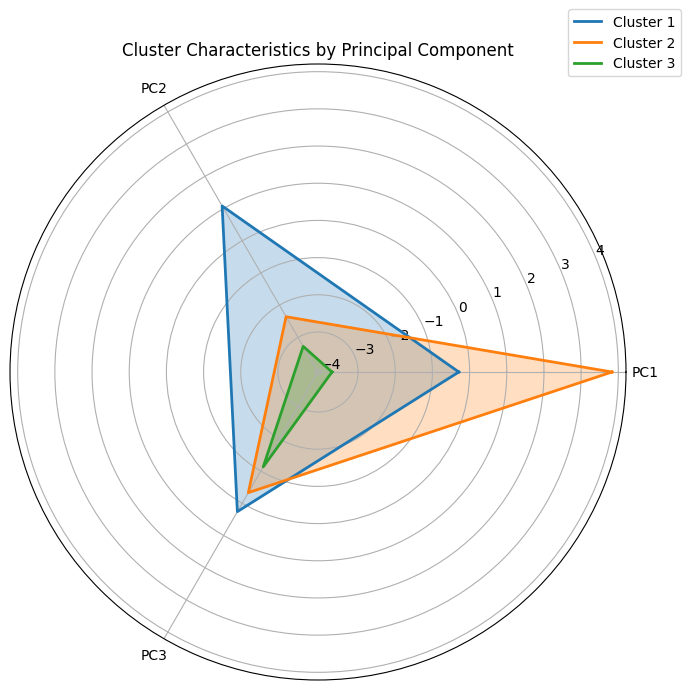

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Sample cluster characteristics data
# Replace 'cluster_centers_pca' with your own DataFrame containing the cluster centers
cluster_centers_pca = pd.DataFrame({
    'PC1': [-0.29, 3.83, -3.70],
    'PC2': [1.08, -2.36, -3.28],
    'PC3': [0.26, -0.33, -1.13],
    'size': [0.72, 0.17, 0.11]  # Example sizes for clusters
}, index=['Cluster 1', 'Cluster 2', 'Cluster 3'])

# Drop 'size' column if it exists for radar chart data
cluster_data = cluster_centers_pca.drop(columns='size')

# Number of variables we're plotting
categories = cluster_data.columns
num_vars = len(categories)

# Compute the angle for each axis in the plot
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for i, (cluster, row) in enumerate(cluster_data.iterrows()):
    values = row.tolist()
    values += values[:1]  # Complete the loop for radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=cluster)
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Cluster Characteristics by Principal Component")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()


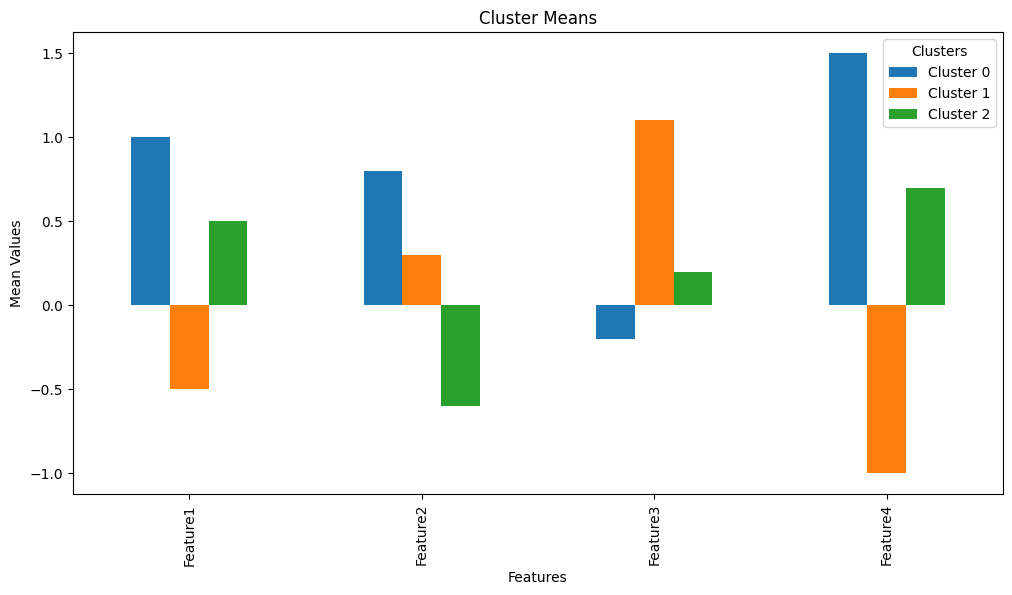

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# Replace 'cluster_means' with your own data for each feature by cluster
cluster_means = pd.DataFrame({
    'Feature1': [1.0, -0.5, 0.5],
    'Feature2': [0.8, 0.3, -0.6],
    'Feature3': [-0.2, 1.1, 0.2],
    'Feature4': [1.5, -1.0, 0.7]
}, index=['Cluster 0', 'Cluster 1', 'Cluster 2'])

# Plotting
cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Means")
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.legend(title="Clusters")
plt.show()


In [59]:
# Data for 2b graph (simulated for cases and profits based on break-even analysis)
cases_2b = list(range(800, 1300, 15))  # Simulated case range for analysis
profits_2b = [1200 + (1.5 * (i - 800)) for i in cases_2b]  # Simulated profit growth (scaled for 2b)

# Highlight specific points for 2b
highlight_cases_2b = [1000, 1100, 1200]  # Key break-even or milestone cases
highlight_profits_2b = [profits_2b[cases_2b.index(i)] for i in highlight_cases_2b]

# Plot the graph for 2b
plt.figure(figsize=(10, 6))
plt.plot(cases_2b, profits_2b, label="Profit", color="blue", linewidth=2)
plt.axhline(y=1400, color='red', linestyle='-', label="Profit Before")  # Fixed profit before
plt.scatter(highlight_cases_2b, highlight_profits_2b, color='red', label="Break-Even Points", zorder=5)

# Add labels, title, and legend
plt.title("Profit Analysis for 2b (Price Decrease)", fontsize=14)
plt.xlabel("Cases Sold", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the graph
plt.show()


ValueError: 1000 is not in list

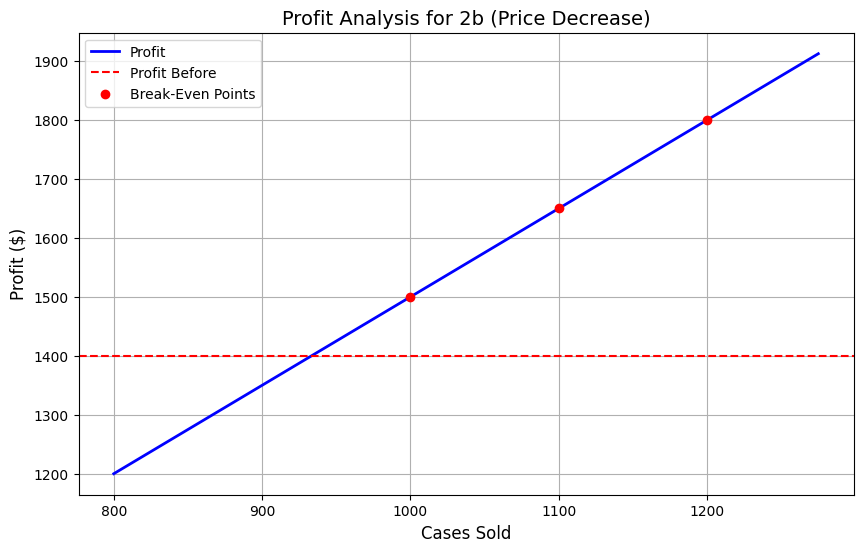

In [60]:
# Data recalculation for 2b analysis
cases_2b = list(range(800, 1300, 25))  # Cases in steps of 25 for clarity
profits_2b = [1200 + (1.5 * (i - 800)) for i in cases_2b]  # Simulated profit growth based on additional sales

# Highlight break-even points
highlight_cases_2b = [1000, 1100, 1200]  # Key break-even or milestone cases
highlight_profits_2b = [profits_2b[cases_2b.index(i)] for i in highlight_cases_2b]

# Plot the graph again
plt.figure(figsize=(10, 6))
plt.plot(cases_2b, profits_2b, label="Profit", color="blue", linewidth=2)
plt.axhline(y=1400, color='red', linestyle='--', label="Profit Before")  # Fixed profit before
plt.scatter(highlight_cases_2b, highlight_profits_2b, color='red', label="Break-Even Points", zorder=5)

# Add labels and title
plt.title("Profit Analysis for 2b (Price Decrease)", fontsize=14)
plt.xlabel("Cases Sold", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.legend()
plt.grid(True)

# Display the graph
plt.show()


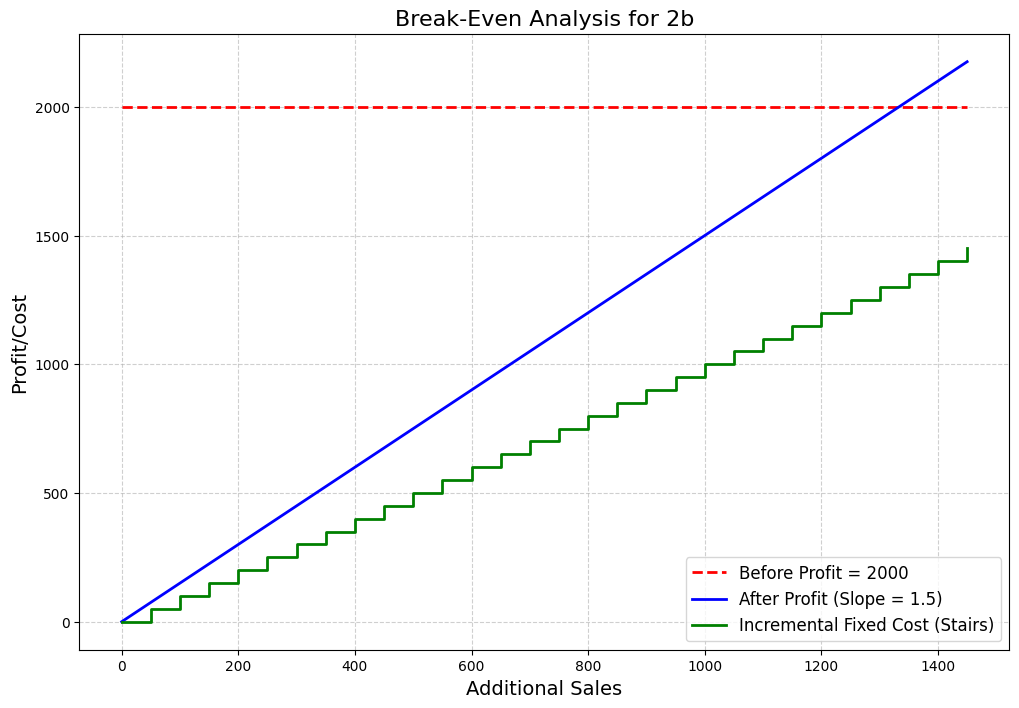

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Additional Sales range
additional_sales = np.arange(0, 1500, 50)  # X-axis: Additional Sales from 1000 to 1500

# Lines for the graph
before_profit = np.full_like(additional_sales, 2000)  # Constant before profit line
after_profit = 1500 + 1.5 * (additional_sales - 1000)  # After profit line with slope 1.5
incremental_fixed_cost = 1000 + ((additional_sales - 1000) // 50) * 50  # Incremental fixed cost (stair-step)

# Plot the graph
plt.figure(figsize=(12, 8))

# Plot each line
plt.plot(additional_sales, before_profit, label="Before Profit = 2000", color="red", linestyle="--", linewidth=2)
plt.plot(additional_sales, after_profit, label="After Profit (Slope = 1.5)", color="blue", linewidth=2)
plt.step(additional_sales, incremental_fixed_cost, label="Incremental Fixed Cost (Stairs)", color="green", where="post", linewidth=2)

# Add labels, title, and legend
plt.title("Break-Even Analysis for 2b", fontsize=16)
plt.xlabel("Additional Sales", fontsize=14)
plt.ylabel("Profit/Cost", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


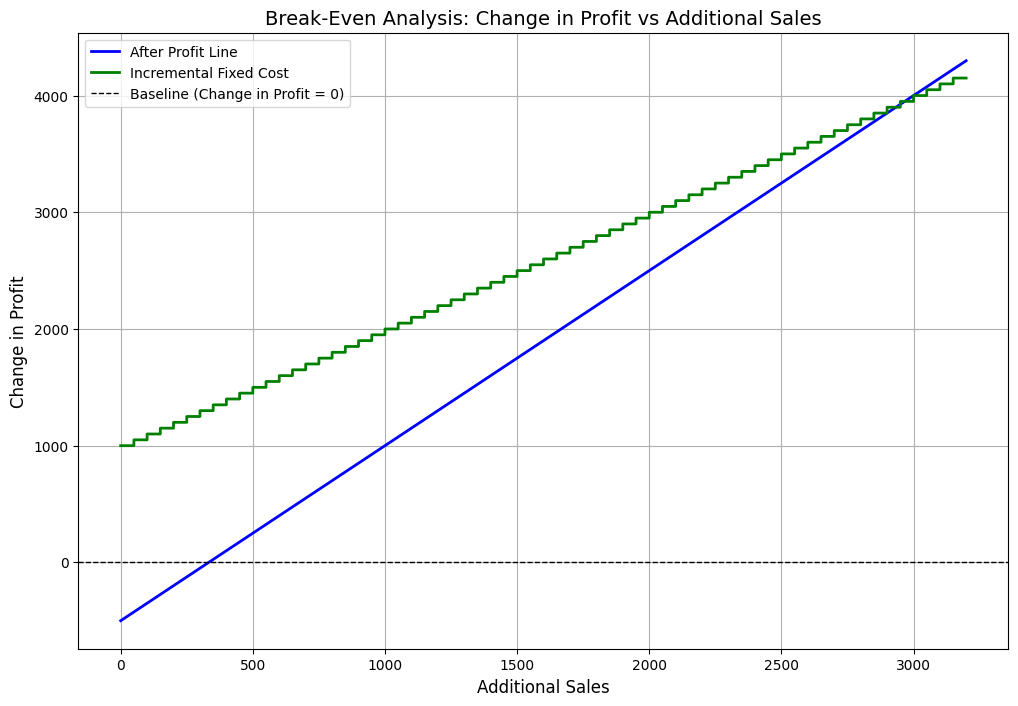

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
x = np.arange(0, 3200, 1)  # Additional sales from 0 to 300
after_profit_line = -500 + 1.5 * x  # Line for after profit with slope 1.5, y-intercept -500

# Incremental fixed cost line (stair-like pattern)
incremental_fixed_cost = [1000 + 50 * (i // 50) for i in x]  # Steps every 50 units

# Plot the graph
plt.figure(figsize=(12, 8))

# Line for after profit
plt.plot(x, after_profit_line, label="After Profit Line", color="blue", linewidth=2)

# Stair-like incremental fixed cost line
plt.step(x, incremental_fixed_cost, label="Incremental Fixed Cost", color="green", linewidth=2, where='post')

# Line at y = 0 (base line)
plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Baseline (Change in Profit = 0)")

# Add labels, legend, and grid
plt.title("Break-Even Analysis: Change in Profit vs Additional Sales", fontsize=14)
plt.xlabel("Additional Sales", fontsize=12)
plt.ylabel("Change in Profit", fontsize=12)
plt.legend()
plt.grid(True)

# Show the graph
plt.show()


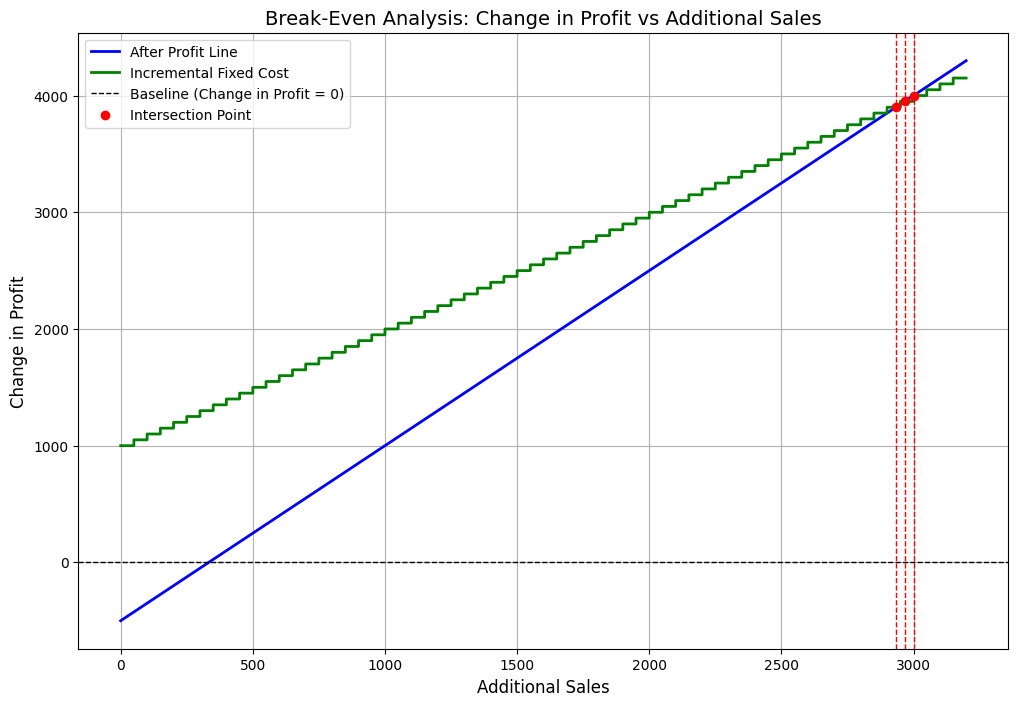

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
x = np.arange(0, 3200, 1)  # Additional sales from 0 to 300
after_profit_line = -500 + 1.5 * x  # Line for after profit with slope 1.5, y-intercept -500

# Incremental fixed cost line (stair-like pattern)
incremental_fixed_cost = [1000 + 50 * (i // 50) for i in x]  # Steps every 50 units

# Calculate intersection points
intersection_points = []
for i in range(len(x)):
    if abs(after_profit_line[i] - incremental_fixed_cost[i]) < 1:  # Check if lines intersect
        intersection_points.append((x[i], incremental_fixed_cost[i]))

# Plot the graph
plt.figure(figsize=(12, 8))

# Line for after profit
plt.plot(x, after_profit_line, label="After Profit Line", color="blue", linewidth=2)

# Stair-like incremental fixed cost line
plt.step(x, incremental_fixed_cost, label="Incremental Fixed Cost", color="green", linewidth=2, where='post')

# Line at y = 0 (base line)
plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Baseline (Change in Profit = 0)")

# Highlight intersection points
for point in intersection_points:
    plt.scatter(point[0], point[1], color='red', zorder=5, label="Intersection Point" if point == intersection_points[0] else "")
    plt.axvline(x=point[0], color='red', linestyle='--', linewidth=1)

# Add labels, legend, and grid
plt.title("Break-Even Analysis: Change in Profit vs Additional Sales", fontsize=14)
plt.xlabel("Additional Sales", fontsize=12)
plt.ylabel("Change in Profit", fontsize=12)
plt.legend()
plt.grid(True)

# Show the graph
plt.show()
